# MGC Optimal Scale
At scale (5,2), pval < 0.0001

In [40]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

import seaborn as sns
sns.set(color_codes=True, style='white', context='talk', font_scale=1)
PALETTE = sns.color_palette("Set1")

from sklearn.metrics import pairwise_distances
#from hyppo.independence import MGC
from scipy.stats import multiscale_graphcorr
from hyppo.ksample._utils import k_sample_transform
from graspy.plot import heatmap

import sys; sys.path.append('../')
from src.tools.utils import get_files, get_latents

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import seaborn as sns
sns.set(color_codes=True, style='white', context='talk', font_scale=2)
PALETTE = sns.color_palette("Set1")
sns.set_palette(PALETTE[3:])

In [3]:
## Define paths
#base_dir = Path('/mnt/ssd3/ronan/data/gcca_05-17-18:27_max_rank-ZG2/')
base_dir = Path('/mnt/ssd3/ronan/data/gcca_old_min_rank-ZG3/')## Define paths

In [15]:
groups, labels = get_latents(base_dir, flag='_gcca-zg')

In [53]:
def doubly_center(D):
    n = D.shape[0]
    C = np.zeros(D.shape)
    mat_sum = np.sum(D)
    for i in range(D.shape[0]):
        for j in range(D.shape[1]):
            C[i,j] = D[i,j] - 1/n*np.sum(D[i,:]) - 1/n*np.sum(D[:,j]) + 1/(n*n)*mat_sum
    
    return C

## Experts vs. novices: top 3 components

In [27]:
ways = [[0],[0],[0],[1],[1],[1]]
X,Y = k_sample_transform(groups, ways=ways)
X = X[:,:,:3].reshape(X.shape[0],-1)

stat, pvalue, mgc_dict = multiscale_graphcorr(X, Y, workers=-1, reps=1000)
print(f'pvalue: {pvalue}')
print(f'opt_scal: {mgc_dict["opt_scale"]}')

pvalue: 0.001
opt_scal: [5, 2]


In [54]:
X_dists = euclidean_distances(X,X)
X_dists_c = doubly_center(X_dists)
X_nn = np.zeros(X_dists_c.shape)

x_scale = mgc_dict["opt_scale"][0]
for i in range(X_dists_c.shape[0]):
    X_nn[i,:] = X_dists_c[i,:] * (X_dists[i,:] <= np.sort(X_dists[i,:])[x_scale])

In [55]:
y = np.repeat(labels, [len(g) for g in groups], axis=0)
outer_labels = [i[0] for i in y]
inner_labels = [i[1] for i in y]
y_labels = [f'{a}' for a,b in y]

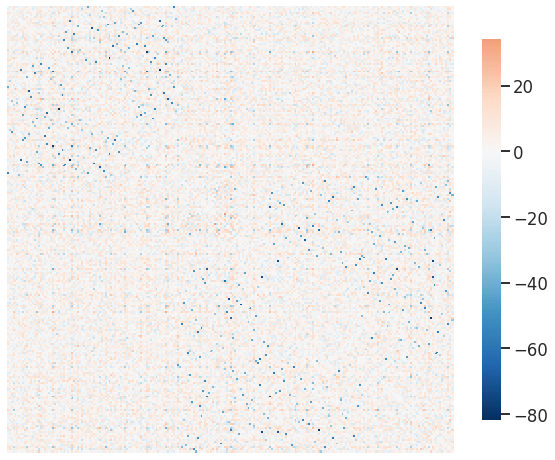

In [60]:
heatmap(X_dists_c- np.diag(np.diag(X_dists_c)))

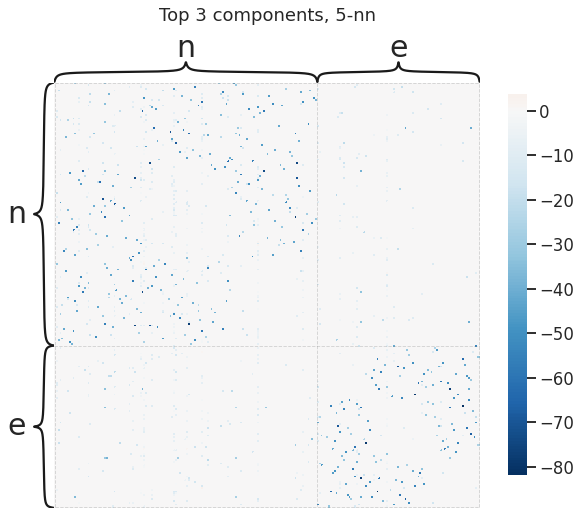

In [57]:
heatmap(X_nn - np.diag(np.diag(X_nn)), title=f'Top 3 components, {x_scale}-nn', transform=None, inner_hier_labels=y_labels)

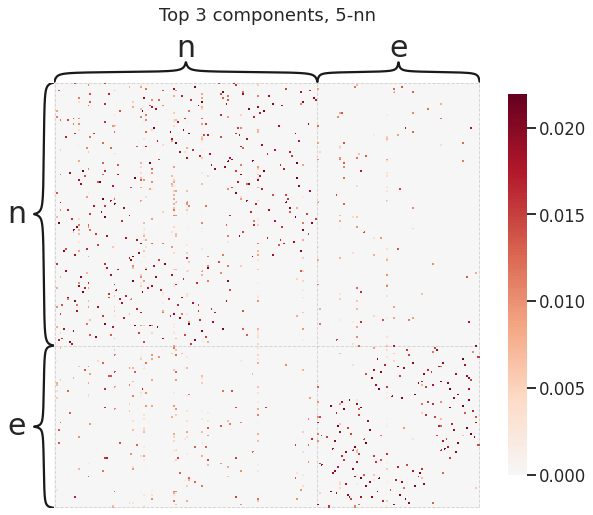

In [38]:
heatmap(-X_nn, title=f'Top 3 components, {x_scale}-nn', transform='simple-all', inner_hier_labels=y_labels)

## Just second component

In [6]:
ways = [[0],[0],[0],[1],[1],[1]]
X,Y = k_sample_transform(groups, ways=ways)
X = X[:,:,1].reshape(X.shape[0],-1)

stat, pvalue, mgc_dict = multiscale_graphcorr(X, Y, workers=-1, reps=1000)
print(f'pvalue: {pvalue}')
print(f'opt_scale: {mgc_dict["opt_scale"]}')

pvalue: 0.001
opt_scale: [3, 1]


In [11]:
X_dists = euclidean_distances(X,X)
X_dists_c = doubly_center(X_dists)
X_nn = np.zeros(X_dists_c.shape)

In [23]:
x_scale = mgc_dict["opt_scale"][0]
for i in range(X_dists_c.shape[0]):
    X_nn[i,:] = X_dists_c[i,:] * (X_dists[i,:] <= np.sort(X_dists[i,:])[x_scale])

In [24]:
y = np.repeat(labels, [len(g) for g in groups], axis=0)
outer_labels = [i[0] for i in y]
inner_labels = [i[1] for i in y]
y_labels = [f'{a}' for a,b in y]

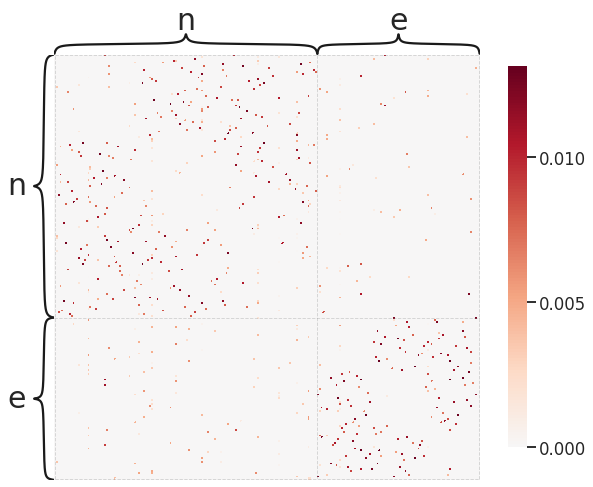

In [25]:
heatmap(-X_nn, transform='simple-all', inner_hier_labels=y_labels)

## Fixed distance optimal scale
optimal scale 207,3

In [41]:
ways = [[0,0],[0,1],[0,2],[1,0],[1,1],[1,2]]
X,Y = k_sample_transform(groups, ways=ways)

In [43]:
X = X[:,:,:3].reshape(X.shape[0],-1)

In [44]:
X_dists = pairwise_distances(X, metric='euclidean')
Y_dists = pairwise_distances(Y, metric='sqeuclidean') / 2

X_dists_c = doubly_center(X_dists)

In [45]:
X_nn = np.zeros(X_dists_c.shape)
x_scale = 207
for i in range(X_dists_c.shape[0]):
    X_nn[i,:] = X_dists_c[i,:] * (X_dists[i,:] <= np.sort(X_dists[i,:])[x_scale])

In [46]:
y = np.repeat(labels, [len(g) for g in groups], axis=0)
outer_labels = [i[0] for i in y]
inner_labels = [i[1] for i in y]
y_labels = [f'{a}' for a,b in y]

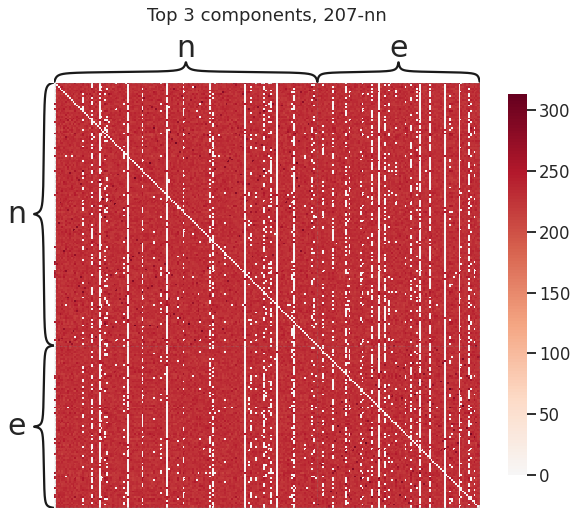

In [52]:
heatmap(-X_nn, title=f'Top 3 components, {x_scale}-nn', transform=None, inner_hier_labels=y_labels)

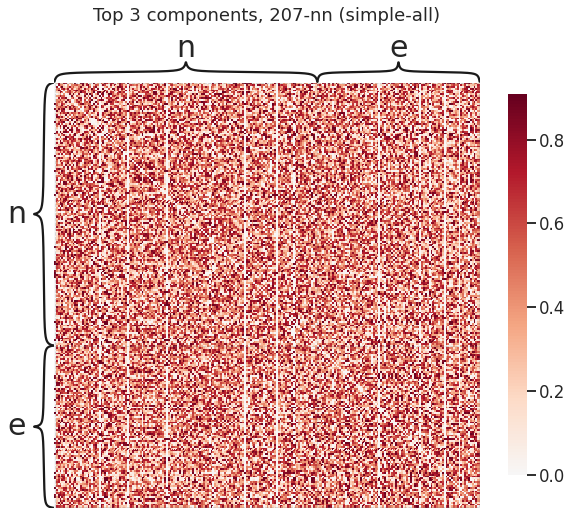

In [48]:
heatmap(-X_nn, title=f'Top 3 components, {x_scale}-nn (simple-all)', transform='simple-all', inner_hier_labels=y_labels)